# Spatial Interpolation of WQ data

This document includes Python codes that clip raster within managed area

In [1]:
import rasterio as rio
from rasterio.mask import mask

from rasterio.plot import show
import geopandas as gpd

In [2]:
path = "E:/Projects/SEACAR_WQ_Pilot/"
gis_path = path+'GIS_data/'
cov_path = gis_path+'covariates/'

col_ls = ['RowID','ParameterName','ParameterUnits','ProgramLocationID','ActivityType','ManagedAreaName',
                   'SampleDate','Year','Month','ResultValue','ValueQualifier','Latitude_DD','Longitude_DD']
para_ls = ["Salinity","Total Nitrogen","Dissolved Oxygen","Turbidity","Secchi Depth"]

dictArea    = {'Gasparilla Sound-Charlotte Harbor Aquatic Preserve':'Charlotte Harbor','Big Bend Seagrasses Aquatic Preserve':'Big Bend',
                'Guana Tolomato Matanzas National Estuarine Research Reserve':'GTM Reserve','Estero Bay Aquatic Preserve':'Estero Bay',
                'Biscayne Bay Aquatic Preserve':'Biscayne Bay','Matlacha Pass Aquatic Preserve':'Matlacha Pass AP',
                'Lemon Bay Aquatic Preserve':'Lemon Bay','Cape Haze Aquatic Preserve':'Cape Haze AP','Pine Island Sound Aquatic Preserve':'Pine Island'}
dictUnits   = {"Salinity":"ppt","Total Nitrogen": "mg/L","Dissolved Oxygen": "mg/L","Turbidity": "NTU", "Secchi Depth": "m"}
#listArea    = dfCon_orig["ManagedAreaName"].unique()
listPara    = ["Salinity","Total Nitrogen","Dissolved Oxygen","Turbidity","Secchi Depth"] 
drySeason   = [11,12,1,2,3,4]
wetSeason = [5,6,7,8,9,10]


Area = 'Gasparilla Sound-Charlotte Harbor Aquatic Preserve'
Para = 'Dissolved Oxygen'
SpatialRef = '3086'
dry_start,dry_end = '11/01/2016','04/30/2017'
wet_start,wet_end = '05/01/2017','10/31/2017'

<AxesSubplot:>

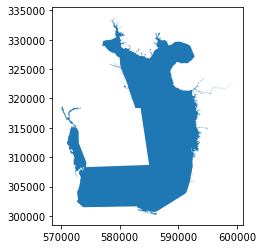

In [6]:
MA = gpd.read_file(gis_path+"ORCP_Managed_Areas_Oct2021.shp")
CH = MA[MA['MA_Name']=='Gasparilla Sound-Charlotte Harbor'].to_crs(int(SpatialRef))
CH.plot()

In [7]:
listArea = ['Gasparilla Sound-Charlotte Harbor Aquatic Preserve','Big Bend Seagrasses Aquatic Preserve',
           'Guana Tolomato Matanzas National Estuarine Research Reserve','Estero Bay Aquatic Preserve',
           'Biscayne Bay Aquatic Preserve','Matlacha Pass Aquatic Preserve','Lemon Bay Aquatic Preserve',
           'Cape Haze Aquatic Preserve','Pine Island Sound Aquatic Preserve'
          ]

# Convert full MA names to short names
dictArea    = {'Gasparilla Sound-Charlotte Harbor Aquatic Preserve':'Charlotte Harbor','Big Bend Seagrasses Aquatic Preserve':'Big Bend',
                'Guana Tolomato Matanzas National Estuarine Research Reserve':'GTM Reserve','Estero Bay Aquatic Preserve':'Estero Bay',
                'Biscayne Bay Aquatic Preserve':'Biscayne Bay','Matlacha Pass Aquatic Preserve':'Matlacha Pass AP',
                'Lemon Bay Aquatic Preserve':'Lemon Bay','Cape Haze Aquatic Preserve':'Cape Haze','Pine Island Sound Aquatic Preserve':'Pine Island'}

# Convert full MA names to MA name in ORCP_Managed_Areas_Oct2021
dictArea2    = {'Gasparilla Sound-Charlotte Harbor Aquatic Preserve':'Gasparilla Sound-Charlotte Harbor','Big Bend Seagrasses Aquatic Preserve':'Big Bend Seagrasses',
                'Guana Tolomato Matanzas National Estuarine Research Reserve':'Guana Tolomato Matanzas NERR','Estero Bay Aquatic Preserve':'Estero Bay',
                'Biscayne Bay Aquatic Preserve':'Biscayne Bay','Matlacha Pass Aquatic Preserve':'Matlacha Pass',
                'Lemon Bay Aquatic Preserve':'Lemon Bay','Cape Haze Aquatic Preserve':'Cape Haze','Pine Island Sound Aquatic Preserve':'Pine Island Sound'}


## Clip Bathymetry raster

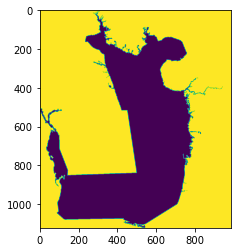

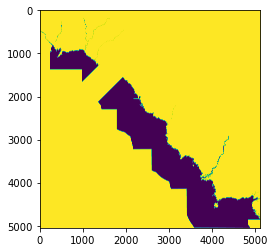

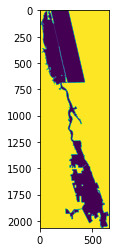

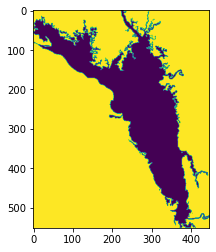

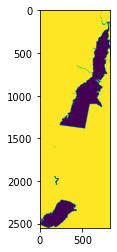

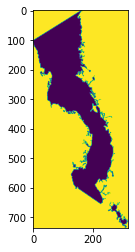

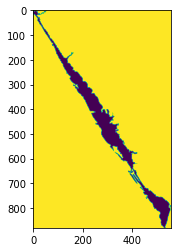

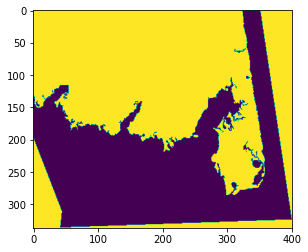

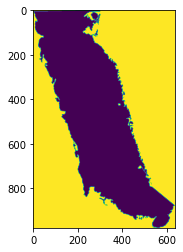

In [35]:
for Area in listArea:
    MA_all = gpd.read_file(gis_path+"ORCP_Managed_Areas_Oct2021.shp")
    MA = MA_all[MA_all['MA_Name']==dictArea2[Area]].to_crs(int(SpatialRef))
    
    with rio.open(cov_path + "NCEI_DEM_30m.tif", "r+") as dasy:
        #rio.plot.show(dasy.read(1))
        out_image, out_transform = mask(dasy, MA.geometry, crop=True)
        out_meta = dasy.meta
        rio.plot.show(out_image)

    out_meta.update({"driver": "GTiff",
                     "height": out_image.shape[1],
                     "width": out_image.shape[2],
                     "transform": out_transform})

    with rio.open(gis_path + "covariates/bathymetry/{}.tif".format(dictArea[Area]), "w", **out_meta) as dest:
        dest.write(out_image)

## Clip LDI raster

In [10]:
MA.crs

<Projected CRS: EPSG:3086>
Name: NAD83 / Florida GDL Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: USA - Florida
- bounds: (-87.63, 24.41, -79.97, 31.01)
Coordinate Operation:
- name: Florida GDL Albers (meters)
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

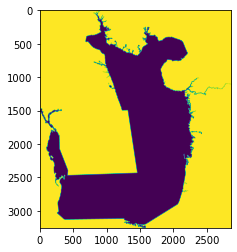

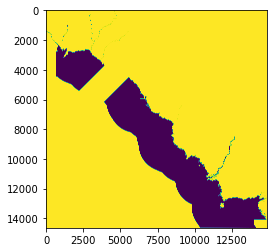

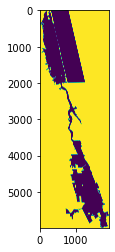

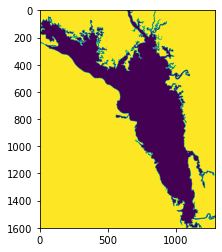

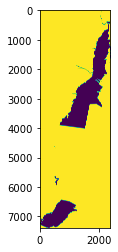

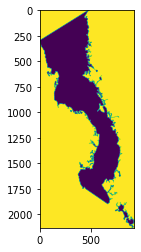

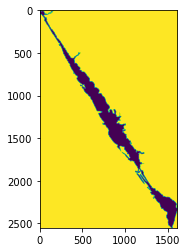

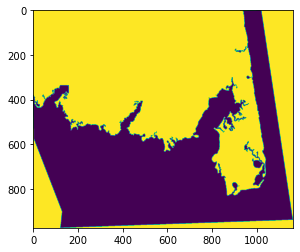

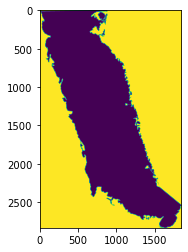

In [14]:
for Area in listArea:
    MA_all = gpd.read_file(gis_path+"ORCP_Managed_Areas_Oct2021.shp")
    MA = MA_all[MA_all['MA_Name']==dictArea2[Area]].to_crs(int(SpatialRef))
    
    with rio.open(cov_path + "LDI_HUC12River_LogScaleSUM_prj.tif", "r+") as dasy:
        #rio.plot.show(dasy.read(1))
        out_image, out_transform = mask(dasy, MA.geometry, crop=True)
        out_meta = dasy.meta
        rio.plot.show(out_image)

    out_meta.update({"driver": "GTiff",
                     "height": out_image.shape[1],
                     "width": out_image.shape[2],
                     "transform": out_transform})

    with rio.open(gis_path + "covariates/ldi/{}.tif".format(dictArea[Area]), "w", **out_meta) as dest:
        dest.write(out_image)

## Clip PopDen raster

In [15]:
MA.crs

<Projected CRS: EPSG:3086>
Name: NAD83 / Florida GDL Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: USA - Florida
- bounds: (-87.63, 24.41, -79.97, 31.01)
Coordinate Operation:
- name: Florida GDL Albers (meters)
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

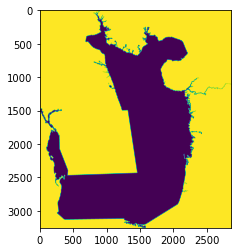

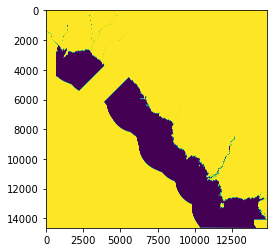

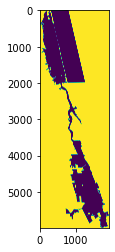

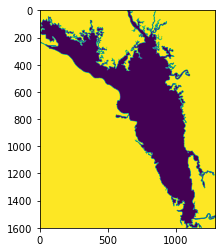

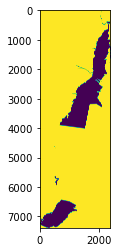

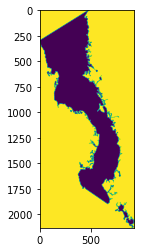

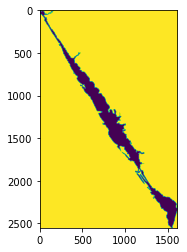

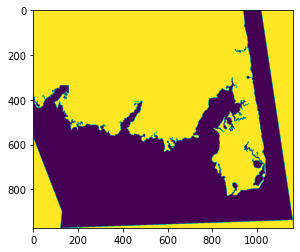

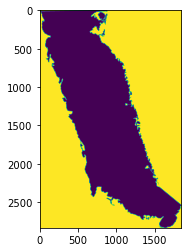

In [16]:
for Area in listArea:
    MA_all = gpd.read_file(gis_path+"ORCP_Managed_Areas_Oct2021.shp")
    MA = MA_all[MA_all['MA_Name']==dictArea2[Area]].to_crs(int(SpatialRef))
    
    with rio.open(cov_path + "PopDens_mi2_HUC10_prj.tif", "r+") as dasy:
        #rio.plot.show(dasy.read(1))
        out_image, out_transform = mask(dasy, MA.geometry, crop=True)
        out_meta = dasy.meta
        rio.plot.show(out_image)

    out_meta.update({"driver": "GTiff",
                     "height": out_image.shape[1],
                     "width": out_image.shape[2],
                     "transform": out_transform})

    with rio.open(gis_path + "covariates/popden/{}.tif".format(dictArea[Area]), "w", **out_meta) as dest:
        dest.write(out_image)

## Clip Water Flow (Dry)

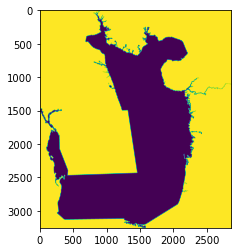

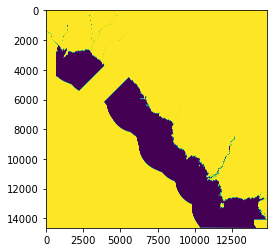

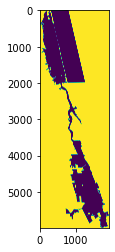

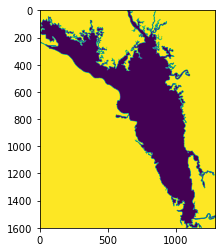

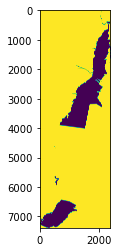

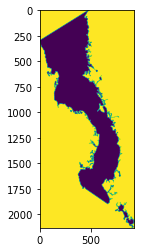

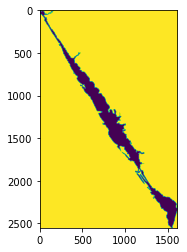

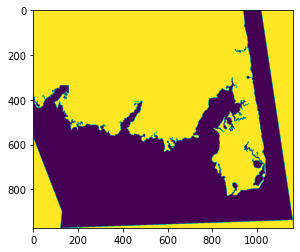

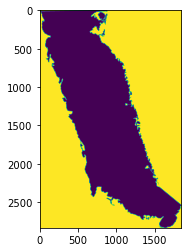

In [20]:
for Area in listArea:
    MA_all = gpd.read_file(gis_path+"ORCP_Managed_Areas_Oct2021.shp")
    MA = MA_all[MA_all['MA_Name']==dictArea2[Area]].to_crs(int(SpatialRef))
    
    with rio.open(cov_path + "WaterFlow_Dry_MaxCFS_prj.tif", "r+") as dasy:
        #rio.plot.show(dasy.read(1))
        out_image, out_transform = mask(dasy, MA.geometry, crop=True)
        out_meta = dasy.meta
        rio.plot.show(out_image)

    out_meta.update({"driver": "GTiff",
                     "height": out_image.shape[1],
                     "width": out_image.shape[2],
                     "transform": out_transform})

    with rio.open(gis_path + "covariates/water_flow_dry/{}.tif".format(dictArea[Area]), "w", **out_meta) as dest:
        dest.write(out_image)

## Clip Water Flow (Wet)

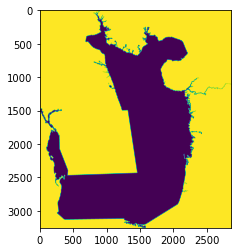

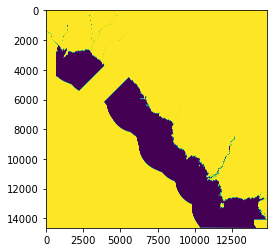

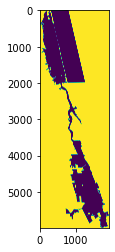

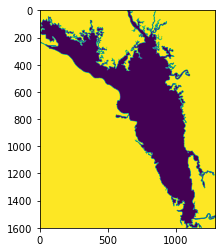

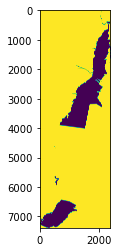

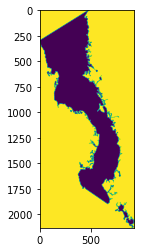

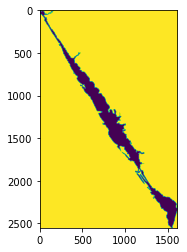

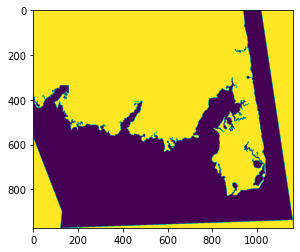

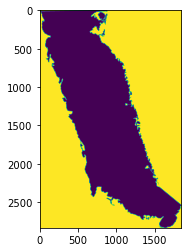

In [19]:
for Area in listArea:
    MA_all = gpd.read_file(gis_path+"ORCP_Managed_Areas_Oct2021.shp")
    MA = MA_all[MA_all['MA_Name']==dictArea2[Area]].to_crs(int(SpatialRef))
    
    with rio.open(cov_path + "WaterFlow_Wet_MaxCFS_prj.tif", "r+") as dasy:
        #rio.plot.show(dasy.read(1))
        out_image, out_transform = mask(dasy, MA.geometry, crop=True)
        out_meta = dasy.meta
        rio.plot.show(out_image)

    out_meta.update({"driver": "GTiff",
                     "height": out_image.shape[1],
                     "width": out_image.shape[2],
                     "transform": out_transform})

    with rio.open(gis_path + "covariates/water_flow_wet/{}.tif".format(dictArea[Area]), "w", **out_meta) as dest:
        dest.write(out_image)